<a href="https://colab.research.google.com/github/HongYeongPyo/first-repository/blob/master/8%EB%94%A5%EB%9F%AC%EB%8B%9D_12%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_250611.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12-2. Boston 주택 가격 예측 모델

## 1. 데이터 로드 및 전처리

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
404
102


In [3]:

# 평균과 표준편차 계산
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

# 훈련 데이터 표준화
train_data = (train_data - mean) / std

# 테스트 데이터도 같은 기준으로 표준화
test_data = (test_data - mean) / std


## 2. 모델 구성 및 컴파일

In [4]:
from tensorflow.keras import models, layers

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))                          # 회귀이므로 출력은 하나

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])                        # 평균절대오차

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 3. 모델 학습

In [5]:

# 검증 데이터 설정
x_val = train_data[:100]
partial_x_train = train_data[100:]

y_val = train_labels[:100]
partial_y_train = train_labels[100:]


# 학습
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=100,
                    batch_size=16,
                    validation_data=(x_val, y_val))


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 526.0978 - mae: 21.2163 - val_loss: 412.9073 - val_mae: 18.0450
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 401.4282 - mae: 17.9457 - val_loss: 264.5514 - val_mae: 14.0157
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 268.1188 - mae: 14.1318 - val_loss: 133.4187 - val_mae: 9.2933
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 111.6349 - mae: 8.9429 - val_loss: 58.9148 - val_mae: 5.4898
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 62.1647 - mae: 6.0845 - val_loss: 39.2454 - val_mae: 4.1260
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 43.5371 - mae: 4.5063 - val_loss: 30.5687 - val_mae: 3.4917
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 32.2310 - mae: 4.1393 - val_loss: 26.7398 - val_mae: 3.2856
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.8581 - mae: 3.6046 - val_loss: 24.2081 - val_mae: 3.1527
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━

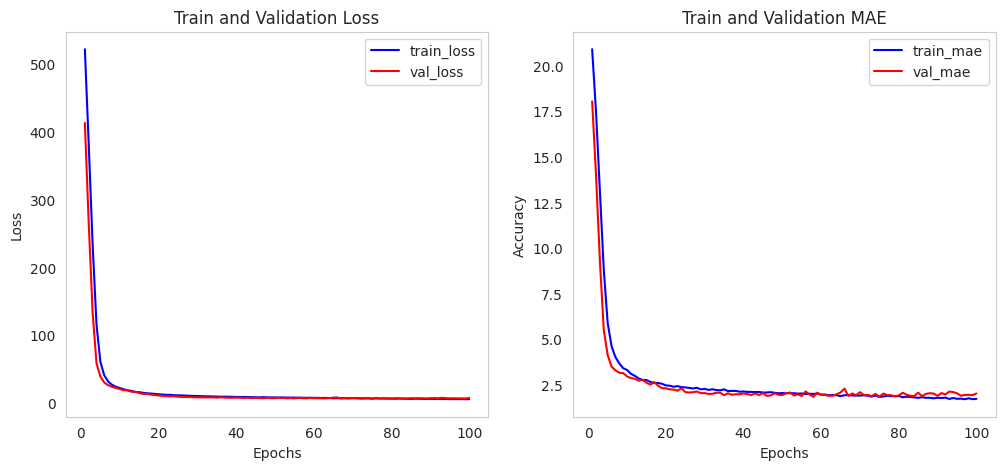

In [8]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
#plt.style.use('seaborn-white')  - 코랩에서 지원되지 않음

# 대체 가능한 기본 스타일 중 하나로 변경
# plt.style.use('seaborn-whitegrid')   # 또는 'ggplot', 'default' 등도 가능  - 여기서도 오류였음

import seaborn as sns
sns.set_style("whitegrid")  # seaborn 스타일을 적용


history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 4. 모델 평가 및 예측

In [9]:
# 테스트 데이터로 모델 평가
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)

print(f"Test MSE: {test_mse_score:.4f}, Test MAE: {test_mae_score:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 12.8960 - mae: 2.5352
Test MSE: 17.7484, Test MAE: 2.7072


# 12-3 Reuters 딥러닝 모델

## 1. 데이터 로드 및 전처리

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [11]:
# reuters 데이터셋 로드 (상위 10,000개의 단어만 사용)
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 훈련 데이터 중 25%를 검증 데이터로 분리
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, train_labels, test_size=0.25, random_state=42
)

# 데이터 개수 및 레이블 클래스 개수 출력
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
6736
2246
2246
46


In [12]:

# 직접 정의한 원-핫 인코딩 함수
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, sequence in enumerate(data):
        results[i, sequence] = 1.0
    return results


# 원-핫 인코딩 수행
x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블을 범주형으로 변환
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

## 2. 모델 구성 및 컴파일

In [13]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))  # 다중 클래스 분류

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,292,142 (4.93 MB)

 Trainable params: 1,291,758 (4.93 MB)

 Non-trainable params: 384 (1.50 KB)

## 3. 모델 학습

In [15]:
checkpoint_cb = callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)
earlystop_cb = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, earlystop_cb])

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.1394 - loss: 4.0485

14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 285ms/step - accuracy: 0.1465 - loss: 4.0143 - val_accuracy: 0.5570 - val_loss: 3.4919
Epoch 2/50
 9/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5175 - loss: 2.3353

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.5303 - loss: 2.2730 - val_accuracy: 0.6376 - val_loss: 3.1309
Epoch 3/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6455 - loss: 1.7138

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6474 - loss: 1.7053 - val_accuracy: 0.6768 - val_loss: 2.8251
Epoch 4/50
 9/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7107 - loss: 1.4117

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7135 - loss: 1.3920 - val_accuracy: 0.6995 - val_loss: 2.5672
Epoch 5/50
12/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7558 - loss: 1.1908

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7562 - loss: 1.1877 - val_accuracy: 0.7008 - val_loss: 2.3751
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7747 - loss: 1.0565

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7752 - loss: 1.0543 - val_accuracy: 0.7026 - val_loss: 2.2207
Epoch 7/50
11/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8035 - loss: 0.9237

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8051 - loss: 0.9173 - val_accuracy: 0.7035 - val_loss: 2.0642
Epoch 8/50
11/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8280 - loss: 0.7958

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8272 - loss: 0.7954 - val_accuracy: 0.7102 - val_loss: 1.9177
Epoch 9/50
 9/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8397 - loss: 0.7640

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8391 - loss: 0.7551 - val_accuracy: 0.7102 - val_loss: 1.8084
Epoch 10/50
10/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8523 - loss: 0.6718

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8538 - loss: 0.6675 - val_accuracy: 0.7182 - val_loss: 1.6934
Epoch 11/50
 9/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8722 - loss: 0.5955

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8695 - loss: 0.5977 - val_accuracy: 0.7337 - val_loss: 1.5700
Epoch 12/50
 9/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8699 - loss: 0.5886

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8703 - loss: 0.5861 - val_accuracy: 0.7431 - val_loss: 1.4625
Epoch 13/50
 9/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8800 - loss: 0.5271

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8803 - loss: 0.5266 - val_accuracy: 0.7458 - val_loss: 1.3808
Epoch 14/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8933 - loss: 0.4653

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8933 - loss: 0.4668 - val_accuracy: 0.7538 - val_loss: 1.2959
Epoch 15/50
 9/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8901 - loss: 0.4771

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8936 - loss: 0.4724 - val_accuracy: 0.7658 - val_loss: 1.2276
Epoch 16/50
 9/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9137 - loss: 0.4077

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9122 - loss: 0.4110 - val_accuracy: 0.7720 - val_loss: 1.1731
Epoch 17/50
 9/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9125 - loss: 0.3881

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9120 - loss: 0.3913 - val_accuracy: 0.7814 - val_loss: 1.1176
Epoch 18/50
 9/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9183 - loss: 0.3794

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9174 - loss: 0.3795 - val_accuracy: 0.7850 - val_loss: 1.0601
Epoch 19/50
 9/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9210 - loss: 0.3551

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9197 - loss: 0.3554 - val_accuracy: 0.7916 - val_loss: 1.0324
Epoch 20/50
 9/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9156 - loss: 0.3526

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9155 - loss: 0.3524 - val_accuracy: 0.7965 - val_loss: 1.0031
Epoch 21/50
 9/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9183 - loss: 0.3321

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9208 - loss: 0.3327 - val_accuracy: 0.7943 - val_loss: 0.9920
Epoch 22/50
10/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9252 - loss: 0.3292

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9259 - loss: 0.3293 - val_accuracy: 0.8005 - val_loss: 0.9716
Epoch 23/50
10/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9298 - loss: 0.3121

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9294 - loss: 0.3146 - val_accuracy: 0.8072 - val_loss: 0.9659
Epoch 24/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9317 - loss: 0.2973 - val_accuracy: 0.8094 - val_loss: 0.9675
Epoch 25/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9371 - loss: 0.2826

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9367 - loss: 0.2838 - val_accuracy: 0.8152 - val_loss: 0.9557
Epoch 26/50
 9/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9417 - loss: 0.2618

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9411 - loss: 0.2674 - val_accuracy: 0.8183 - val_loss: 0.9501
Epoch 27/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9369 - loss: 0.2731 - val_accuracy: 0.8139 - val_loss: 0.9503
Epoch 28/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9451 - loss: 0.2733 - val_accuracy: 0.8139 - val_loss: 0.9608
Epoch 29/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9437 - loss: 0.2528 - val_accuracy: 0.8130 - val_loss: 0.9750
Epoch 30/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9429 - loss: 0.2490 - val_accuracy: 0.8121 - val_loss: 0.9897
Epoch 31/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9418 - loss: 0.2448 - val_accuracy: 0.8170 - val_loss: 1.0054


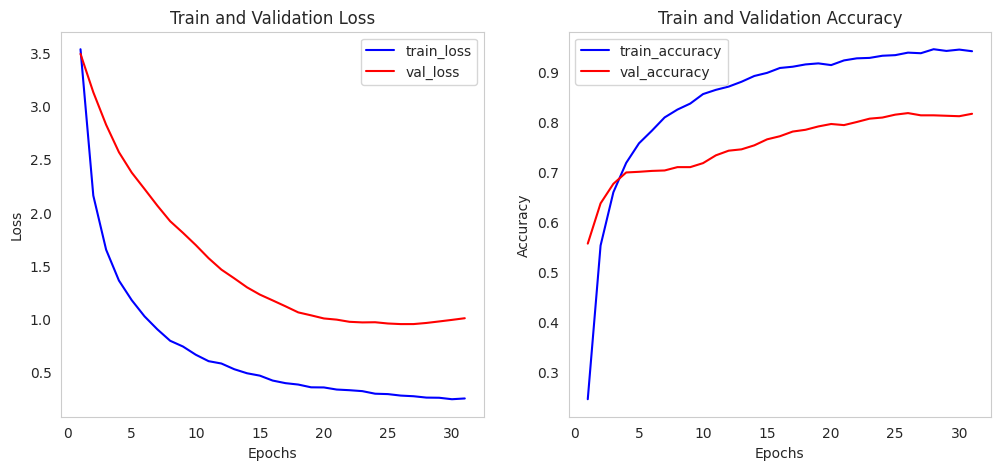

In [17]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
#plt.style.use('seaborn-white')

import seaborn as sns
sns.set_style("whitegrid")  # seaborn 스타일을 적용

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 4. 모델 평가 및 예측

In [18]:

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7940 - loss: 1.0477
Test Loss: 1.0409, Test Accuracy: 0.7912


# 12-4 CIFAR10 딥러닝 모델

## 1. 데이터 로드 및 전처리

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [20]:
# CIFAR-10 데이터셋 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 검증용 20% 분리
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42
)

# 출력
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [21]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


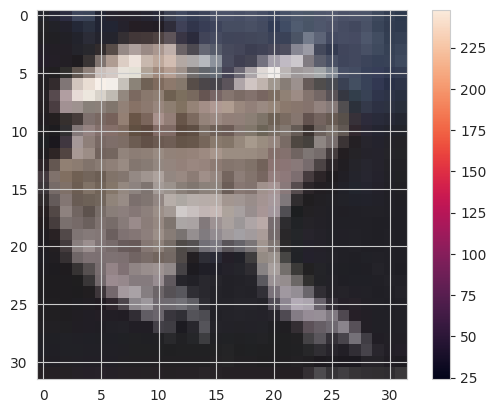

In [23]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
#plt.style.use('seaborn-white')

import seaborn as sns
sns.set_style("whitegrid")  # seaborn 스타일을 적용

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()


In [24]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)


(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [25]:
# 정규화: 0~1 사이 값으로
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# 레이블은 1차원으로 평탄화 (학습용 시 to_categorical 등과 함께 사용 예정)
y_train = y_train.flatten()
y_val = y_val.flatten()
y_test = y_test.flatten()

# 확인
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [26]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.


## 2. 모델 구성 및 컴파일

In [27]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.GlobalAveragePooling2D())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10, activation='softmax'))  # CIFAR-10은 클래스 10개

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,050 (402.54 KB)

 Trainable params: 102,602 (400.79 KB)

 Non-trainable params: 448 (1.75 KB)

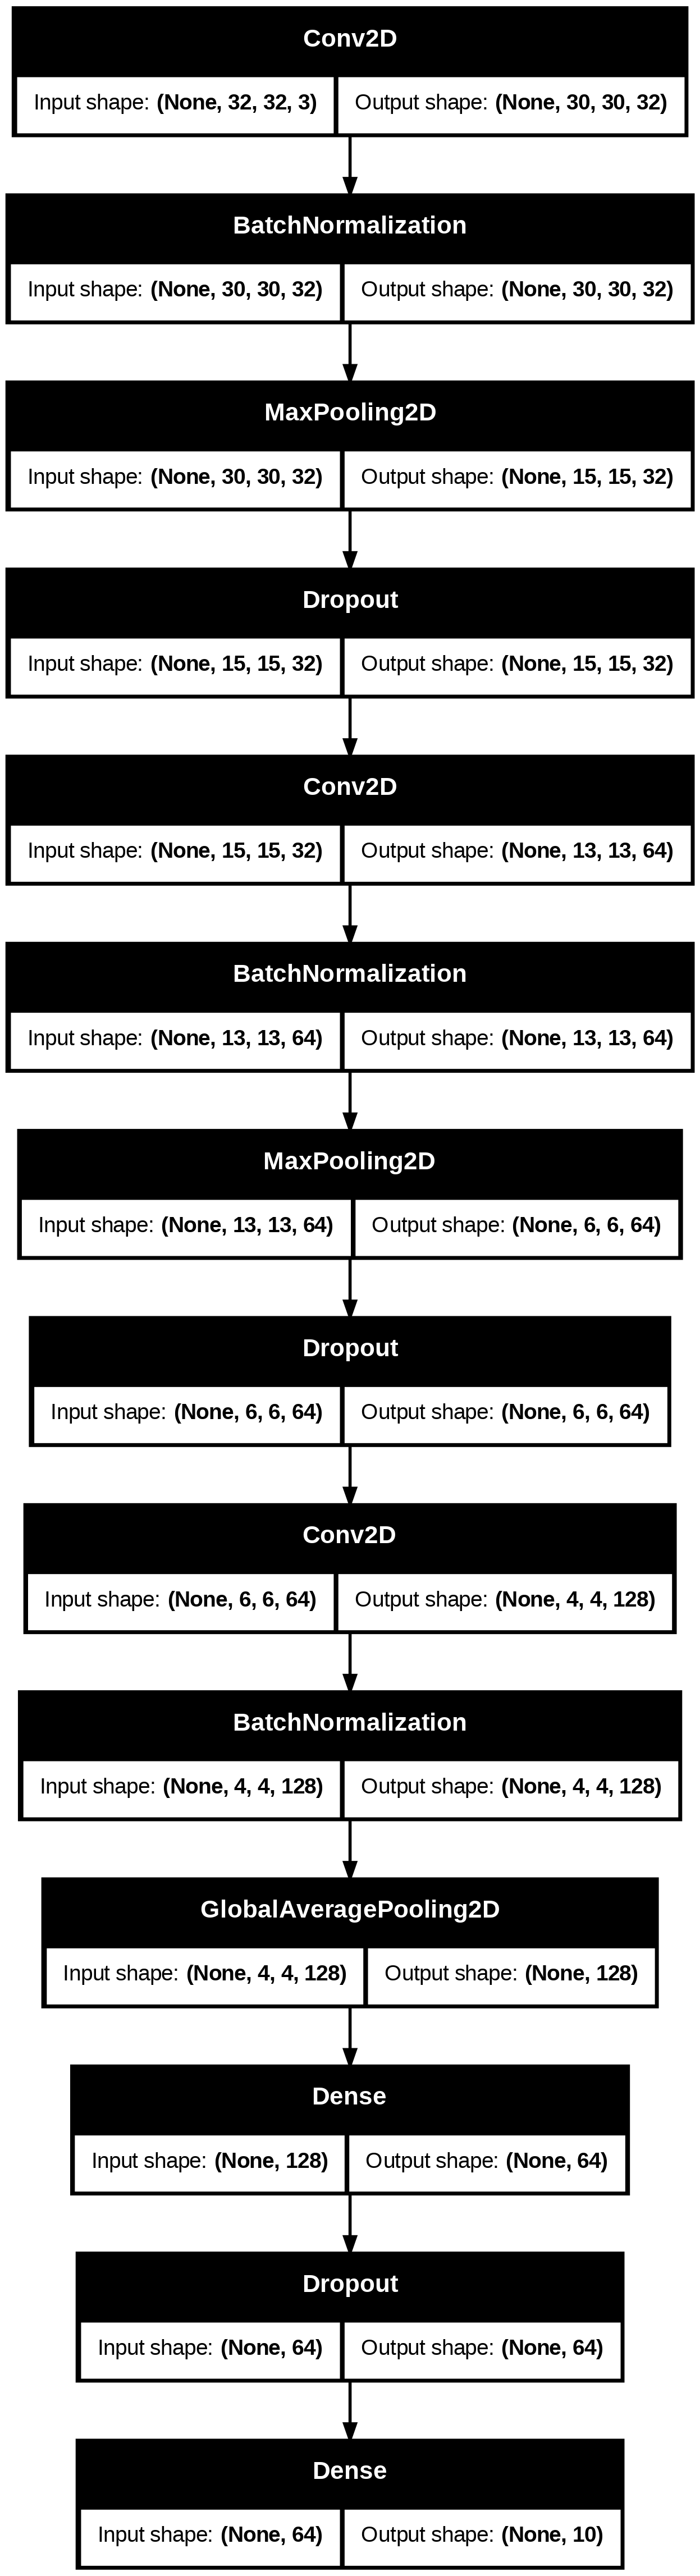

In [29]:
utils.plot_model(model, show_shapes=True)

## 3. 모델 학습

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint("best_cifar10_model.h5", save_best_only=True)
earlystop_cb = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, earlystop_cb])


Epoch 1/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3196 - loss: 1.8634

625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3198 - loss: 1.8629 - val_accuracy: 0.1655 - val_loss: 2.5280
Epoch 2/50
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4852 - loss: 1.4327

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4853 - loss: 1.4325 - val_accuracy: 0.3750 - val_loss: 2.0166
Epoch 3/50
615/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5465 - loss: 1.2875

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5467 - loss: 1.2872 - val_accuracy: 0.4589 - val_loss: 1.5449
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5784 - loss: 1.2023 - val_accuracy: 0.1301 - val_loss: 7.8830
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6038 - loss: 1.1360 - val_accuracy: 0.1855 - val_loss: 3.1884
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6155 - loss: 1.0962 - val_accuracy: 0.3287 - val_loss: 2.6398
Epoch 7/50
620/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6381 - loss: 1.0357

625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6381 - loss: 1.0358 - val_accuracy: 0.5291 - val_loss: 1.4049
Epoch 8/50
617/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6471 - loss: 1.0112

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6472 - loss: 1.0112 - val_accuracy: 0.5805 - val_loss: 1.2334
Epoch 9/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6594 - loss: 0.9861 - val_accuracy: 0.2606 - val_loss: 3.4529
Epoch 10/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6640 - loss: 0.9636 - val_accuracy: 0.1139 - val_loss: 14.2364
Epoch 11/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6687 - loss: 0.9560 - val_accuracy: 0.1422 - val_loss: 14.3142
Epoch 12/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6820 - loss: 0.9169 - val_accuracy: 0.1349 - val_loss: 20.9639
Epoch 13/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6852 - loss: 0.9066 - val_accuracy: 0.1908 - val_loss: 3.7274


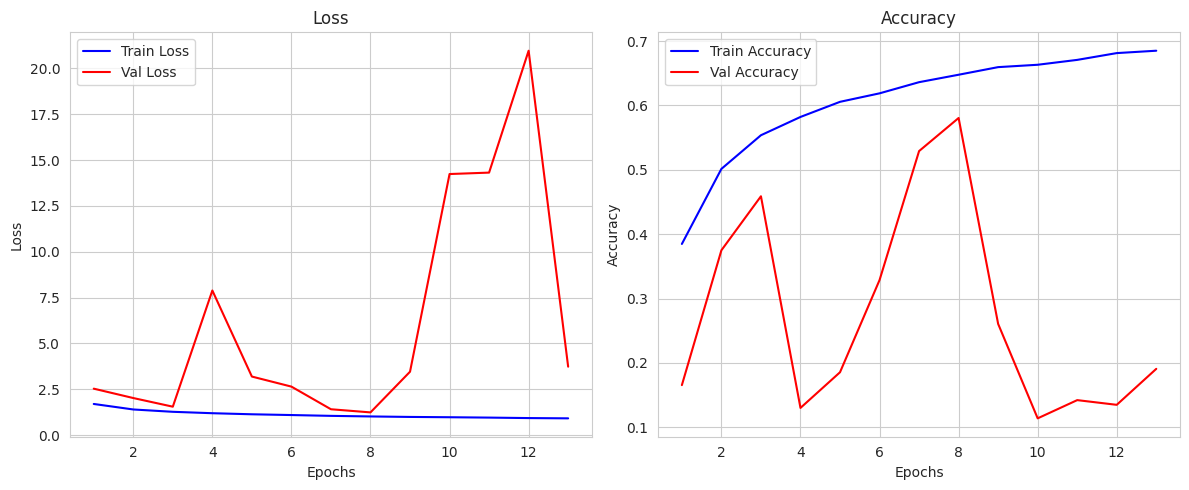

In [32]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# [[YOUR CODE]]

#plt.style.use('seaborn-white')

import seaborn as sns
sns.set_style("whitegrid")  # seaborn 스타일을 적용


history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)

fig = plt.figure(figsize=(12, 5))

# 손실 그래프
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, history_dict['loss'], 'b-', label='Train Loss')
ax1.plot(epochs, history_dict['val_loss'], 'r-', label='Val Loss')
ax1.set_title('Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# 정확도 그래프
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, history_dict['accuracy'], 'b-', label='Train Accuracy')
ax2.plot(epochs, history_dict['val_accuracy'], 'r-', label='Val Accuracy')
ax2.set_title('Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()




## 4. 모델 평가 및 예측

In [33]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5763 - loss: 1.2520


[1.2509949207305908, 0.5723999738693237]